# Dados e bibliotecas

O dado MNIST é um problema clássico dentro das aplicações de rede neural, possuindo bons resultados. Por isso escolhi o MultiLayer Perceptron para solução do problema, disponível na biblioteca Keras. O MultiLayer Perceptron segue as características básicas de uma rede neural e permite adicionar camadas ocultas entre a camada de entrada/input e a camada de saída/output.

In [1]:
import pandas as pd
import numpy as np
import keras
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Dense, InputLayer  

Por favor, adicionar mnist_train.csv na pasta MNIST para o código rodar, pois o GitHub não permitiu subir o arquivo por causa do tamanho.

In [2]:
mnist_train = pd.read_csv('MNIST/mnist_train.csv')
mnist_test = pd.read_csv('MNIST/mnist_test.csv')

In [3]:
mnist_train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
mnist_test

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- 60.000 observações na base de treinamento
- 10.000 observações na base de teste
- 784 variáveis/colunas/dimensão
- Dígitos de 0 a 10
- Não é preciso fazer nenhum pré-processamento nas bases

## Frequência das classes nas bases

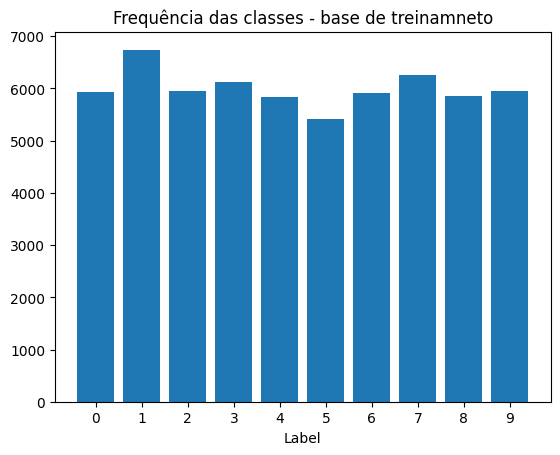

In [5]:
fig, ax = plt.subplots()
ax.bar([0,1,2,3,4,5,6,7,8,9], [mnist_train.value_counts(subset='label')[0], mnist_train.value_counts(subset='label')[1], mnist_train.value_counts(subset='label')[2], mnist_train.value_counts(subset='label')[3], mnist_train.value_counts(subset='label')[4], mnist_train.value_counts(subset='label')[5], mnist_train.value_counts(subset='label')[6], mnist_train.value_counts(subset='label')[7], mnist_train.value_counts(subset='label')[8], mnist_train.value_counts(subset='label')[9]])
plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.xlabel('Label')
plt.title('Frequência das classes - base de treinamneto')
plt.show()

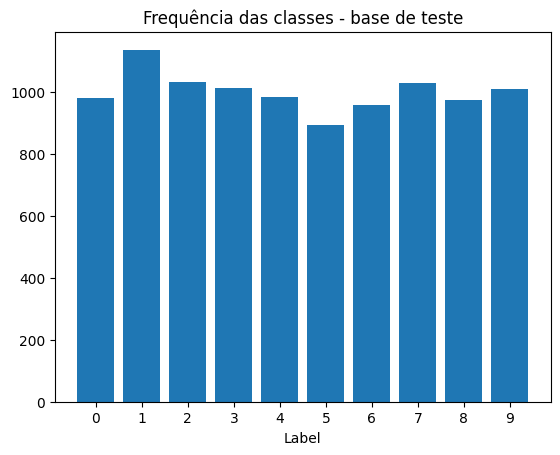

In [6]:
fig, ax = plt.subplots()
ax.bar([0,1,2,3,4,5,6,7,8,9], [mnist_test.value_counts(subset='label')[0], mnist_test.value_counts(subset='label')[1], mnist_test.value_counts(subset='label')[2], mnist_test.value_counts(subset='label')[3], mnist_test.value_counts(subset='label')[4], mnist_test.value_counts(subset='label')[5], mnist_test.value_counts(subset='label')[6], mnist_test.value_counts(subset='label')[7], mnist_test.value_counts(subset='label')[8], mnist_test.value_counts(subset='label')[9]])
plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.xlabel('Label')
plt.title('Frequência das classes - base de teste')
plt.show()

## Separação entre label e data/dados

keras.utils.to_categorical: representa as classes em array; label 0 torna-se [0,0,0,0,0,0,0,0,0], label 1 torna-se [0,1,0,0,0,0,0,0,0] etc. 
<p> Representação que será utilizada na rede neural.

In [7]:
data = mnist_train.iloc[:, 1:].values
label = mnist_train.iloc[:, 0].values
label_categorical = keras.utils.to_categorical(mnist_train.iloc[:, 0].values, 10) 

In [8]:
data_test = mnist_test.iloc[:,1:].values
label_test = mnist_test.iloc[:, 0].values
label_test_categorical = keras.utils.to_categorical(mnist_test.iloc[:, 0].values, 10)

# Rede Neural

## Modelo

- Camada de entrada/Input layer: quant. de neurônios igual a dimensão dos dados de entrada
- Camada oculta com função Relu (comumente utilizada na camada oculta por ótima performance)
- Camada de saída/Output layer com função softmax: quant. de neurônios igual a quantidade de classes
   - A função softmax garante que o dado seja rotulado com uma única classe
- Dense: todos os neurônios da camada de entrada conectados com todos os neurônios da camada oculta. Todos os neurônios da camada oculta conectados com todos os neurônios da camada de saída. Essa conexão são os pesos.

In [9]:
modelo_ann = Sequential()
modelo_ann.add(InputLayer((784,)),)
modelo_ann.add(Dense(500, activation='relu', name='CamadaOculta-1'))
modelo_ann.add(Dense(10, activation='softmax', name='Output'))

<kbd>
  <img src="MLP MNIST.png" />
</kbd>

## Treinamento

Testes: 
- 1 a 2 camadas ocultas (o suficente para problemas não tão complexos)
- Uma maneira de definir a quantidade de neurônios na(s) camadas(s) oculta(s) é pela média da quantidade de neurônios na camada de entrada com a quantidade na camada de saída. Logo, iniciei testando 400 neurônios e fui aumentando em 50, testando também 450 e 500.
- batch_size (Número de amostras por atualização de gradiente): 100 e 120  
- epochs (quantidade de iterações): 10, 15 e 20

<p> Rede e treinamento escolhido:

- Uma camada oculta 
- 500 neurônios na camada oculta
- batch_size = 100
- epochs = 20

- Otimização: SGD (Stochastic Gradient Descendent), comumente utilizado por causa do seu bom desempenho, ajuda a encontrar o valor ideal dos pesos utilizando parte do conjunto de dados (batch) ou uma único dado aleatório para atualização dos parâmetros; 
- loss = 'categorical_crossentropy', função de perda utilizada quando se tem mais de duas classes/dois neurônios de saída

In [10]:
modelo_ann.compile('SGD', loss='categorical_crossentropy', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

In [11]:
result = modelo_ann.fit(x=data, y=label_categorical, batch_size = 100, epochs = 20, verbose = 1)

Epoch 1/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.5798 - loss: 480.0294 - precision: 0.7581 - recall: 0.4873
Epoch 2/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8923 - loss: 0.4474 - precision: 0.9360 - recall: 0.8538
Epoch 3/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9015 - loss: 0.4414 - precision: 0.9397 - recall: 0.8548
Epoch 4/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9155 - loss: 0.3542 - precision: 0.9492 - recall: 0.8901
Epoch 5/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9228 - loss: 0.3187 - precision: 0.9532 - recall: 0.9000
Epoch 6/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8574 - loss: 0.5680 - precision: 0.9478 - recall: 0.7670
Epoch 7/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9276 - loss: 0.2951 - precision: 0.9553 - recall: 0.9084
Epoch 8/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9235 - loss: 0.2928 - precision: 0.9597 - recall: 0.9064
Epoch 9/

**Acurácia final de 95%.** O valor e os resultados de predição pode variar um pouco, já que a inicialização dos pesos é aleatória. Nas vezes que testei, a acurácia manteve-se acima de 90%.

## Validação com os dados de teste - Acurácia

In [12]:
modelo_ann.evaluate(data_test, label_test_categorical)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9317 - loss: 0.3725 - precision: 0.9483 - recall: 0.9182


[0.31666016578674316,
 0.9394999742507935,
 0.9564858675003052,
 0.9276000261306763]

O método .evaluate prediz as classes e retorna a acurácia, que nada mais é a taxa de acerto do modelo. Logo:
- **Acurácia de 93% nos dados de teste**
- **Precision geral: 95%**
- **Recall geral 92%**.

Novamente, os valores podem variar um pouco em uma nova execução do código, pois a inicialização dos pesos da rede é aleatória, o que impacta nos resultados.

# Matriz de Confusão do Modelo + Precision e Recall por classe/label

A matriz de confusão expõe os erros e acertos do modelo. Nela, podemos identificar os famosos *True Positive (TP)*, *False Positive (FP)*, *True Negative (TN)* e *False Negative (FN)*, e com isso, calcular métricas como *Precision* e *Recall*.

<p> Diagonal principal: quantidade de acertos do modelo

<p> Precision: quantidade de acertos do modelo quando o próprio modelo prevê a classes X; TP / (TP+FP)

<p> Recall: quantidade de acertos do modelo quando o rótulo verdadeiro é a classe X; TP/ (TP+FN)

In [13]:
# Predicão das classes
modelo_labels = modelo_ann.predict(data)
# Conversão de classes em array para dado numérico
modelo_labels_numeric = np.argmax(modelo_labels, axis = 1) 
# Matriz de confusão 
confusion_mtx_train = confusion_matrix(label, modelo_labels_numeric) 

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step


Text(0.5, 23.52222222222222, 'Rótulo Encontrado')

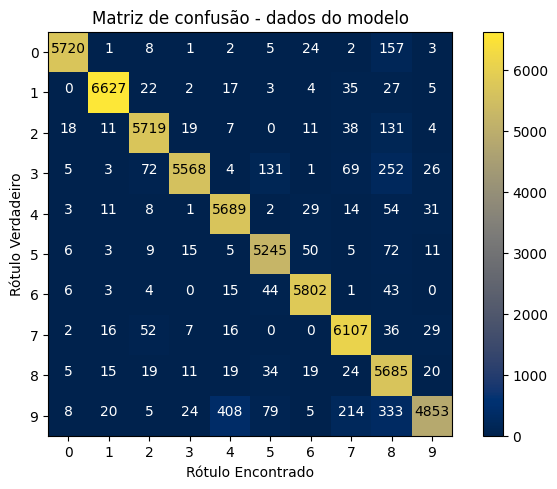

In [14]:
plt.imshow(confusion_mtx_train, interpolation='nearest', cmap='cividis')
plt.title('Matriz de confusão - dados do modelo')
plt.colorbar()
tick_marks = np.arange(0,10,1)
plt.xticks(tick_marks, range(10))
plt.yticks(tick_marks, range(10))

thresh = confusion_mtx_train.max() / 2.
for i, j in itertools.product(range(confusion_mtx_train.shape[0]), range(confusion_mtx_train.shape[1])):
    plt.text(j, i, confusion_mtx_train[i, j],
        horizontalalignment="center",
        color="black" if confusion_mtx_train[i, j] > thresh else "white")

plt.tight_layout()
plt.ylabel('Rótulo Verdadeiro')
plt.xlabel('Rótulo Encontrado')

## Precision e Recall 

In [28]:
df_train_metrics = pd.DataFrame(
{    'Precision': np.nan,
    'Recall': np.nan},
    index=['rotulo 0', 'rotulo 1', 'rotulo 2', 'rotulo 3', 'rotulo 4', 'rotulo 5', 'rotulo 6', 'rotulo 7', 'rotulo 8', 'rotulo 9']
)

for index, i in zip(df_train_metrics.index, range(10)):
    df_train_metrics.loc[index, 'Precision'] = confusion_mtx_train[i,i]/sum(confusion_mtx_train[:, i])
    df_train_metrics.loc[index, 'Recall'] = confusion_mtx_train[i,i]/sum(confusion_mtx_train[i][:])

In [31]:
df_train_metrics.round(2)

,Precision,Recall
rotulo 0,0.99,0.97
rotulo 1,0.99,0.98
rotulo 2,0.97,0.96
rotulo 3,0.99,0.91
rotulo 4,0.92,0.97
rotulo 5,0.95,0.97
rotulo 6,0.98,0.98
rotulo 7,0.94,0.97
rotulo 8,0.84,0.97
rotulo 9,0.97,0.82


# Matriz de Confusão dos dados de teste + Precision e Recall

A matriz de confusão expõe os erros e acertos do modelo. Nela, podemos identificar os famosos *True Positive (TP)*, *False Positive (FP)*, *True Negative (TN)* e *False Negative (FN)*, e com isso, calcular métricas como *Precision* e *Recall*.

<p> Diagonal principal: quantidade de acertos do modelo

<p> Precision: quantidade de acertos do modelo quando o próprio modelo prevê a classes X; TP / (TP+FP)

<p> Recall: quantidade de acertos do modelo quando o rótulo verdadeiro é a classe X; TP/ (TP+FN)

In [18]:
# Predicão das classes
test_labels = modelo_ann.predict(data_test)
# Conversão de classes em array para dado numérico
test_labels_numeric = np.argmax(test_labels, axis = 1) 
# Matriz de confusão 
confusion_mtx_test = confusion_matrix(label_test, test_labels_numeric) 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Text(0.5, 23.52222222222222, 'Rótulo Encontrado')

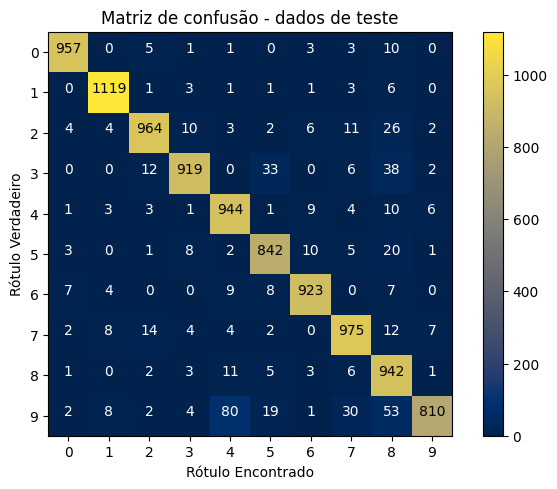

In [19]:
plt.imshow(confusion_mtx_test, interpolation='nearest', cmap='cividis')
plt.title('Matriz de confusão - dados de teste')
plt.colorbar()
tick_marks = np.arange(0,10,1)
plt.xticks(tick_marks, range(10))
plt.yticks(tick_marks, range(10))

thresh = confusion_mtx_test.max() / 2.
for i, j in itertools.product(range(confusion_mtx_test.shape[0]), range(confusion_mtx_test.shape[1])):
    plt.text(j, i, confusion_mtx_test[i, j],
        horizontalalignment="center",
        color="black" if confusion_mtx_test[i, j] > thresh else "white")

plt.tight_layout()
plt.ylabel('Rótulo Verdadeiro')
plt.xlabel('Rótulo Encontrado')

## Precision e Recall 

In [26]:
df_test_metrics = pd.DataFrame(
{    'Precision': np.nan,
    'Recall': np.nan},
    index=['rotulo 0', 'rotulo 1', 'rotulo 2', 'rotulo 3', 'rotulo 4', 'rotulo 5', 'rotulo 6', 'rotulo 7', 'rotulo 8', 'rotulo 9']
)
for index, i in zip(df_test_metrics.index, range(10)):
    df_test_metrics.loc[index, 'Precision'] = confusion_mtx_test[i,i]/sum(confusion_mtx_test[:, i])
    df_test_metrics.loc[index, 'Recall'] = confusion_mtx_test[i,i]/sum(confusion_mtx_test[i][:])

In [30]:
df_test_metrics.round(2)

,Precision,Recall
rotulo 0,0.98,0.98
rotulo 1,0.98,0.99
rotulo 2,0.96,0.93
rotulo 3,0.96,0.91
rotulo 4,0.89,0.96
rotulo 5,0.92,0.94
rotulo 6,0.97,0.96
rotulo 7,0.93,0.95
rotulo 8,0.84,0.97
rotulo 9,0.98,0.80


É possível obter as métricas de forma mais direta, imprimindo a função *classification_report* da biblioteca *sklearn.metrics*

In [25]:
print(classification_report(label_test, test_labels_numeric))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.96      0.93      0.95      1032
           3       0.96      0.91      0.94      1010
           4       0.89      0.96      0.93       982
           5       0.92      0.94      0.93       892
           6       0.97      0.96      0.96       958
           7       0.93      0.95      0.94      1028
           8       0.84      0.97      0.90       974
           9       0.98      0.80      0.88      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000

